# Review of the Alternate Regression Solutions (Multiple Regression, Ridge, Lasso, Elastic Net)

#### This notebook reviews all other regression models this paper explored, both with optimisation, looking ahead, and language segmentation

In [5]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import dateutil.parser as parser
from datetime import datetime, date, timedelta
import torch
import skorch
import scipy
import torch.nn as nn
import torch
import torch.nn.functional as F
import sys
from skorch.helper import DataFrameTransformer
import time
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer
from skorch.callbacks import EarlyStopping
from sklearn.pipeline import Pipeline
import pickle
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import emoji
def identity_tokenizer(text):
    return text
def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

In [20]:
with open("x_train.txt", "rb") as fp:   # Unpickling
    x_train = pickle.load(fp)
with open("y_train.txt", "rb") as fp:   # Unpickling
    y_train = pickle.load(fp)
with open("x_test.txt", "rb") as fp:   # Unpickling
    x_test = pickle.load(fp)
with open("y_test.txt", "rb") as fp:   # Unpickling
    y_test = pickle.load(fp)
    
with open("x_train_ah.txt", "rb") as fp:   # Unpickling
    x_train_ah = pickle.load(fp)
y_train_ah = pd.read_csv("y_train_ah.csv")
with open("x_test_ah.txt", "rb") as fp:   # Unpickling
    x_test_ah = pickle.load(fp)
y_test_ah = pd.read_csv("y_test_ah.csv")

with open("x_holdout2.txt", "rb") as fp:   # Unpickling
    x_holdout = pickle.load(fp)
with open("y_holdout2.txt", "rb") as fp:   # Unpickling
    y_holdout = pickle.load(fp)
with open("y_holdout2_dates.txt", "rb") as fp:   # Unpickling
    y_holdout_dates = pickle.load(fp)
    
with open("X_ah.txt", "rb") as fp:   # Unpickling
    X_initial = pickle.load(fp)

In [7]:
merged = pd.read_csv('mergedfullwithmoredates.csv')
merged = merged.dropna(subset=['Change1','Change2','Change3','Change4','Change5'])
merged = merged.reset_index(drop=True)

In [8]:
y_holdout

,Change,Change1,Change2,Change3,Change4,Change5
31175,0.67,2.06,1.95,1.035,1.66,2.36
31176,0.67,2.06,1.95,1.035,1.66,2.36
31177,0.67,2.06,1.95,1.035,1.66,2.36
31178,0.67,2.06,1.95,1.035,1.66,2.36
31179,0.67,2.06,1.95,1.035,1.66,2.36
...,...,...,...,...,...,...
440014,-0.63,0.39,1.20,-0.550,-1.71,1.53
440015,-0.63,0.39,1.20,-0.550,-1.71,1.53
440016,-0.63,0.39,1.20,-0.550,-1.71,1.53
440017,-0.63,0.39,1.20,-0.550,-1.71,1.53


### Multiple Regression

In [4]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()


def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lin_model", lin_model)])


pipe.fit(X=x_train, y=y_train)
y_pred2 = pipe.predict(x_train)
rmse = mean_squared_error(y_train, y_pred2, squared = False)
print('Training RMSE:', rmse)
y_pred = pipe.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Test RMSE:', rmse)
y_holdout2 = y_holdout['Change']
y_pred = pipe.predict(x_holdout)
rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
print('Holdout RMSE:', rmse)


Training RMSE: 1.9879745084886398
Test RMSE: 1.9941300218718843
Holdout RMSE: 11.94369227821615


In [3]:
lists = ['Change1','Change2','Change3','Change4','Change5']
from sklearn.linear_model import LinearRegression
rmselist_train = []
rmselist_test = []
rmselist_holdout = []
start = time.time()
for pred in range(len(lists)):
    print(lists[pred])
    y_train2 = y_train_ah.iloc[:,pred]
    y_test2 = y_test_ah.iloc[:,pred]
    y_holdout2 = y_holdout.iloc[:,pred]
    y_train2 = y_train2.values.reshape(-1,1)
    y_test2 = y_test2.values.reshape(-1,1)
    y_holdout2 = y_holdout2.values.reshape(-1,1)
    y_train2 = y_train2.astype(np.float32)
    y_test2 = y_test2.astype(np.float32)
    y_holdout2 = y_holdout2.astype(np.float32)
    
    lin_model = LinearRegression()


    def typechange(x):
        return x.astype(dtype = np.float32)
    typetransform = FunctionTransformer(typechange)

    pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lin_model", lin_model)])


    pipe.fit(X=x_train_ah, y=y_train2)
    
    y_pred2 = pipe.predict(x_train_ah)
    rmse = mean_squared_error(y_train2, y_pred2, squared = False)
    print('Training RMSE:', rmse)
    rmselist_train.append(rmse)
    
    y_pred = pipe.predict(x_test_ah)
    rmse = mean_squared_error(y_test2, y_pred, squared = False)
    print('Test RMSE:', rmse)
    rmselist_test.append(rmse)
    
    y_pred = pipe.predict(x_holdout)
    rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
    print('Holdout RMSE:', rmse)
    
#     print(lists[pred], "RMSE:", rmse)
    rmselist_holdout.append(rmse)
    print()

min_index = rmselist_holdout.index((min(rmselist_holdout)))
print("Optimum parameters:", lists[min_index],":",min(rmselist_holdout))
end = time.time()
print("Time Elapsed:", (end-start))
print()

Change1
Training RMSE: 1.9871622719452695
Test RMSE: 1.9968815768525612
Holdout RMSE: 11.941154676068457

Change2
Training RMSE: 1.8567744111671762
Test RMSE: 1.8635542684483954
Holdout RMSE: 1.4121806964084114

Change3
Training RMSE: 1.9431300540865584
Test RMSE: 1.9546906451033452
Holdout RMSE: 1.3923609300559459

Change4
Training RMSE: 1.9373312701965817
Test RMSE: 1.9476985573209231
Holdout RMSE: 1.6051959744287494

Change5
Training RMSE: 1.933503568142637
Test RMSE: 1.9452098230131207
Holdout RMSE: 1.5724847568827323

Optimum parameters: Change3 : 1.3923609300559459
Time Elapsed: 17700.60690164566



In [6]:
lists = ['Change5']
from sklearn.linear_model import LinearRegression
rmselist_train = []
rmselist_test = []
rmselist_holdout = []
start = time.time()
print(lists[0])
y_train2 = y_train_ah.iloc[:,5]
y_test2 = y_test_ah.iloc[:,5]
y_holdout2 = y_holdout.iloc[:,5]
y_train2 = y_train2.values.reshape(-1,1)
y_test2 = y_test2.values.reshape(-1,1)
y_holdout2 = y_holdout2.values.reshape(-1,1)
y_train2 = y_train2.astype(np.float32)
y_test2 = y_test2.astype(np.float32)
y_holdout2 = y_holdout2.astype(np.float32)

lin_model = LinearRegression()


def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lin_model", lin_model)])


pipe.fit(X=x_train_ah, y=y_train2)

y_pred2 = pipe.predict(x_train_ah)
rmse = mean_squared_error(y_train2, y_pred2, squared = False)
print('Training RMSE:', rmse)
rmselist_train.append(rmse)

y_pred = pipe.predict(x_test_ah)
rmse = mean_squared_error(y_test2, y_pred, squared = False)
print('Test RMSE:', rmse)
rmselist_test.append(rmse)

y_pred = pipe.predict(x_holdout)
rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
print('Holdout RMSE:', rmse)

#     print(lists[pred], "RMSE:", rmse)
rmselist_holdout.append(rmse)
print()

end = time.time()
print("Time Elapsed:", (end-start))
print()

Change5
Training RMSE: 1.980618345942676
Test RMSE: 1.9880775444322023
Holdout RMSE: 1.6374950132280592

Time Elapsed: 3703.0643060207367



In [30]:
# Now segmented by language
rmselist_train = []
rmselist_test = []
rmselist_holdout = []

langlist = ['en','ja','ko','es','fr']
lists = ['Change','Change1','Change2','Change3','Change4','Change5']
for lang in langlist:
    
    print(lang)
    y = merged[['Change','Change1','Change2','Change3','Change4','Change5']].loc[merged['lang'] == lang]
    index = merged.index[merged['lang'] == lang].tolist()
    X = pd.DataFrame(X_initial)
    X['lang'] = merged['lang']
    X = X[0].loc[merged['lang'] == lang]
    X = X.to_list()
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for pred in range(len(lists)):
        print(lists[pred])
        y_train2 = y_train.iloc[:,pred]
        y_test2 = y_test.iloc[:,pred]
        y_holdout2 = y_holdout.iloc[:,pred]
        y_train2 = y_train2.values.reshape(-1,1)
        y_test2 = y_test2.values.reshape(-1,1)
        y_holdout2 = y_holdout2.values.reshape(-1,1)
        y_train2 = y_train2.astype(np.float32)
        y_test2 = y_test2.astype(np.float32)
        y_holdout2 = y_holdout2.astype(np.float32)

        lin_model = LinearRegression()


        def typechange(x):
            return x.astype(dtype = np.float32)
        typetransform = FunctionTransformer(typechange)

        pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lin_model", lin_model)])


        pipe.fit(X=x_train, y=y_train2)

        y_pred2 = pipe.predict(x_train)
        rmse = mean_squared_error(y_train2, y_pred2, squared = False)
        print('Training RMSE:', rmse)
        rmselist_train.append(rmse)

        y_pred = pipe.predict(x_test)
        rmse = mean_squared_error(y_test2, y_pred, squared = False)
        print('Test RMSE:', rmse)
        rmselist_test.append(rmse)

        y_pred = pipe.predict(x_holdout)
        rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
        print('Holdout RMSE:', rmse)

    #     print(lists[pred], "RMSE:", rmse)
        rmselist_holdout.append(rmse)


min_index = rmselist_holdout.index((min(rmselist_holdout)))
print("Optimum parameters:", lists[min_index],":",min(rmselist_holdout))
print()

en
Change
Training RMSE: 2.052734108599661
Test RMSE: 2.0562158766910636
Holdout RMSE: 12.102274865949974
Change1
Training RMSE: 1.9186272720707023
Test RMSE: 1.9243353829353504
Holdout RMSE: 2.26981458866851
Change2
Training RMSE: 2.004302849642087
Test RMSE: 2.008703595676273
Holdout RMSE: 2.4797119252376754
Change3
Training RMSE: 1.9723507214800309
Test RMSE: 1.9802720537857834
Holdout RMSE: 2.6187897741259305
Change4
Training RMSE: 1.9782388419279535
Test RMSE: 1.9888037635550042
Holdout RMSE: 2.3035261442251107
Change5
Training RMSE: 2.0300196505544177
Test RMSE: 2.0380071998541283
Holdout RMSE: 2.653302074909105
ja


ValueError: Found input variables with inconsistent numbers of samples: [184170, 340862]

In [34]:
rmselist_train = []
rmselist_test = []
rmselist_holdout = []
# Now segmented by language, continuation as initial error after english occurred.
langlist = ['ja','ko','es','fr']
lists = ['Change','Change1','Change2','Change3','Change4','Change5']
for lang in langlist:

    print(lang)
    y = merged[['Change','Change1','Change2','Change3','Change4','Change5']].loc[merged['lang'] == lang]
    index = merged.index[merged['lang'] == lang].tolist()
    X = pd.DataFrame(X_initial)
    X['lang'] = merged['lang']
    X = X[0].loc[merged['lang'] == lang]
    X = X.to_list()
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for pred in range(len(lists)):
        print(lists[pred])
        y_train2 = y_train.iloc[:,pred]
        y_test2 = y_test.iloc[:,pred]
        y_holdout2 = y_holdout.iloc[:,pred]
        y_train2 = y_train2.values.reshape(-1,1)
        y_test2 = y_test2.values.reshape(-1,1)
        y_holdout2 = y_holdout2.values.reshape(-1,1)
        y_train2 = y_train2.astype(np.float32)
        y_test2 = y_test2.astype(np.float32)
        y_holdout2 = y_holdout2.astype(np.float32)

        lin_model = LinearRegression()


        def typechange(x):
            return x.astype(dtype = np.float32)
        typetransform = FunctionTransformer(typechange)

        pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lin_model", lin_model)])


        pipe.fit(X=x_train, y=y_train2)

        y_pred2 = pipe.predict(x_train)
        rmse = mean_squared_error(y_train2, y_pred2, squared = False)
        print('Training RMSE:', rmse)
        rmselist_train.append(rmse)

        y_pred = pipe.predict(x_test)
        rmse = mean_squared_error(y_test2, y_pred, squared = False)
        print('Test RMSE:', rmse)
        rmselist_test.append(rmse)

        y_pred = pipe.predict(x_holdout)
        rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
        print('Holdout RMSE:', rmse)

    #     print(lists[pred], "RMSE:", rmse)
        rmselist_holdout.append(rmse)


min_index = rmselist_holdout.index((min(rmselist_holdout)))
print("Optimum parameters:", lists[min_index],":",min(rmselist_holdout))
print()

ja
Change
Training RMSE: 1.9951143880497975
Test RMSE: 195.58327520212293
Holdout RMSE: 1772.8611235811677
Change1
Training RMSE: 1.8523765706137159
Test RMSE: 623.8933584380849
Holdout RMSE: 6483.4619558514205
Change2
Training RMSE: 1.9464293131950612
Test RMSE: 599.0991870114809
Holdout RMSE: 6156.837539158761
Change3
Training RMSE: 1.9558407715743529
Test RMSE: 888.6094526536083
Holdout RMSE: 7814.273711729095
Change4
Training RMSE: 1.9191730011213461
Test RMSE: 336.77805303883235
Holdout RMSE: 3631.104237000532
Change5
Training RMSE: 2.0254384793498574
Test RMSE: 1321.8031575900113
Holdout RMSE: 12298.410015147172
ko
Change
Training RMSE: 0.8761717097059595
Test RMSE: 0.9510380624352269
Holdout RMSE: 12.22150408107232
Change1
Training RMSE: 0.838125407030394
Test RMSE: 0.9009697473291757
Holdout RMSE: 2.728803595830387
Change2
Training RMSE: 0.8565025365396818
Test RMSE: 0.9291848432925033
Holdout RMSE: 1.6779799401204878
Change3
Training RMSE: 0.9058755236871733
Test RMSE: 0.96130

IndexError: list index out of range

### Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()


def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ridge_model", ridge_model)])


pipe.fit(X=x_train, y=y_train)
y_pred = pipe.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('RMSE:', rmse)

RMSE: 1.9896362


In [6]:
rangelist = np.logspace(-5, 2, 50)
print(rangelist)

[1.00000000e-05 1.38949549e-05 1.93069773e-05 2.68269580e-05
 3.72759372e-05 5.17947468e-05 7.19685673e-05 1.00000000e-04
 1.38949549e-04 1.93069773e-04 2.68269580e-04 3.72759372e-04
 5.17947468e-04 7.19685673e-04 1.00000000e-03 1.38949549e-03
 1.93069773e-03 2.68269580e-03 3.72759372e-03 5.17947468e-03
 7.19685673e-03 1.00000000e-02 1.38949549e-02 1.93069773e-02
 2.68269580e-02 3.72759372e-02 5.17947468e-02 7.19685673e-02
 1.00000000e-01 1.38949549e-01 1.93069773e-01 2.68269580e-01
 3.72759372e-01 5.17947468e-01 7.19685673e-01 1.00000000e+00
 1.38949549e+00 1.93069773e+00 2.68269580e+00 3.72759372e+00
 5.17947468e+00 7.19685673e+00 1.00000000e+01 1.38949549e+01
 1.93069773e+01 2.68269580e+01 3.72759372e+01 5.17947468e+01
 7.19685673e+01 1.00000000e+02]


In [24]:
# optimising alpha
rmselist = []
for r in rangelist:
    ridge_model = Ridge(alpha = r)


    def typechange(x):
        return x.astype(dtype = np.float32)
    typetransform = FunctionTransformer(typechange)

    pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ridge_model", ridge_model)])


    pipe.fit(X=x_train, y=y_train)
    y_pred = pipe.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(r,'RMSE:', rmse)
    rmselist.append(rmse)
    
min_index = rmselist.index((min(rmselist)))
print("Optimum parameters:", rangelist[min_index],":",min(rmselist))

1e-05 RMSE: 2.0167823
1.3894954943731388e-05 RMSE: 2.0132132
1.9306977288832496e-05 RMSE: 2.0154734
2.6826957952797274e-05 RMSE: 2.0137775
3.727593720314938e-05 RMSE: 2.0124006
5.1794746792312125e-05 RMSE: 2.0130188
7.196856730011514e-05 RMSE: 2.0124938
0.0001 RMSE: 2.0127099
0.00013894954943731373 RMSE: 2.0120583
0.00019306977288832496 RMSE: 2.012334
0.00026826957952797245 RMSE: 2.010891
0.0003727593720314938 RMSE: 2.0105393
0.0005179474679231213 RMSE: 2.0092287
0.0007196856730011514 RMSE: 2.0082896
0.001 RMSE: 2.006572
0.0013894954943731374 RMSE: 2.005066
0.0019306977288832496 RMSE: 2.003894
0.0026826957952797246 RMSE: 2.0026326
0.003727593720314938 RMSE: 2.0013375
0.005179474679231208 RMSE: 2.0005932
0.007196856730011514 RMSE: 1.9993536
0.01 RMSE: 1.9985099
0.013894954943731374 RMSE: 1.9977165
0.019306977288832496 RMSE: 1.9968549
0.026826957952797246 RMSE: 1.9960574
0.03727593720314938 RMSE: 1.9952542
0.05179474679231207 RMSE: 1.9945084
0.07196856730011514 RMSE: 1.9937649
0.1 RMSE: 

In [6]:
# optimum ridge model
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 2.682695795279722)


def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ridge_model", ridge_model)])


pipe.fit(X=x_train, y=y_train)
y_pred2 = pipe.predict(x_train)
rmse = mean_squared_error(y_train, y_pred2, squared = False)
print('Training RMSE:', rmse)
y_pred = pipe.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Test RMSE:', rmse)
y_holdout2 = y_holdout['Change']
y_pred = pipe.predict(x_holdout)
rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
print('Holdout RMSE:', rmse)


Training RMSE: 1.9866813
Test RMSE: 1.9892164
Holdout RMSE: 11.942524210963645


In [35]:
# ridge days ahead exploration
from sklearn.linear_model import Ridge
lists = ['Change','Change1','Change2','Change3','Change4','Change5']
rmselist_train = []
rmselist_test = []
rmselist_holdout = []
for pred in range(len(lists)):
    print(lists[pred])
    y_train2 = y_train_ah.iloc[:,pred]
    y_test2 = y_test_ah.iloc[:,pred]
    y_holdout2 = y_holdout.iloc[:,pred]
    y_train2 = y_train2.values.reshape(-1,1)
    y_test2 = y_test2.values.reshape(-1,1)
    y_holdout2 = y_holdout2.values.reshape(-1,1)
    y_train2 = y_train2.astype(np.float32)
    y_test2 = y_test2.astype(np.float32)
    y_holdout2 = y_holdout2.astype(np.float32)
    

    ridge_model = Ridge(alpha = 2.682695795279722)


    def typechange(x):
        return x.astype(dtype = np.float32)
    typetransform = FunctionTransformer(typechange)

    pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ridge_model", ridge_model)])


    pipe.fit(X=x_train_ah, y=y_train2)
    
    y_pred2 = pipe.predict(x_train_ah)
    rmse = mean_squared_error(y_train2, y_pred2, squared = False)
    print('Training RMSE:', rmse)
    rmselist_train.append(rmse)
    
    y_pred = pipe.predict(x_test_ah)
    rmse = mean_squared_error(y_test2, y_pred, squared = False)
    print('Test RMSE:', rmse)
    rmselist_test.append(rmse)
    
    y_pred = pipe.predict(x_holdout)
    rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
    print('Holdout RMSE:', rmse)
    
#     print(lists[pred], "RMSE:", rmse)
    rmselist_holdout.append(rmse)


min_index = rmselist_holdout.index((min(rmselist_holdout)))
print("Optimum parameters:", lists[min_index],":",min(rmselist_holdout))
print()

Change
Training RMSE: 1.9893645
Test RMSE: 1.9930153
Holdout RMSE: 11.938582
Change1
Training RMSE: 1.8589519
Test RMSE: 1.860796
Holdout RMSE: 1.3869921
Change2
Training RMSE: 1.9453189
Test RMSE: 1.9516338
Holdout RMSE: 1.3591362
Change3
Training RMSE: 1.9396087
Test RMSE: 1.9445893
Holdout RMSE: 1.5802459
Change4
Training RMSE: 1.9356306
Test RMSE: 1.9414724
Holdout RMSE: 1.5485331
Change5
Training RMSE: 1.9829544
Test RMSE: 1.9856278
Holdout RMSE: 1.6165622
Optimum parameters: Change2 : 1.3591362



In [36]:
# ridge language segmentation exploration
rmselist_train = []
rmselist_test = []
rmselist_holdout = []

langlist = ['en','ja','ko','es','fr']
lists = ['Change','Change1','Change2','Change3','Change4','Change5']
for lang in langlist:

    print(lang)
    y = merged[['Change','Change1','Change2','Change3','Change4','Change5']].loc[merged['lang'] == lang]
    index = merged.index[merged['lang'] == lang].tolist()
    X = pd.DataFrame(X_initial)
    X['lang'] = merged['lang']
    X = X[0].loc[merged['lang'] == lang]
    X = X.to_list()
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for pred in range(len(lists)):
        print(lists[pred])
        y_train2 = y_train.iloc[:,pred]
        y_test2 = y_test.iloc[:,pred]
        y_holdout2 = y_holdout.iloc[:,pred]
        y_train2 = y_train2.values.reshape(-1,1)
        y_test2 = y_test2.values.reshape(-1,1)
        y_holdout2 = y_holdout2.values.reshape(-1,1)
        y_train2 = y_train2.astype(np.float32)
        y_test2 = y_test2.astype(np.float32)
        y_holdout2 = y_holdout2.astype(np.float32)

        ridge_model = Ridge(alpha = 2.682695795279722)


        def typechange(x):
            return x.astype(dtype = np.float32)
        typetransform = FunctionTransformer(typechange)

        pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ridge_model", ridge_model)])


        pipe.fit(X=x_train, y=y_train2)

        y_pred2 = pipe.predict(x_train)
        rmse = mean_squared_error(y_train2, y_pred2, squared = False)
        print('Training RMSE:', rmse)
        rmselist_train.append(rmse)

        y_pred = pipe.predict(x_test)
        rmse = mean_squared_error(y_test2, y_pred, squared = False)
        print('Test RMSE:', rmse)
        rmselist_test.append(rmse)

        y_pred = pipe.predict(x_holdout)
        rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
        print('Holdout RMSE:', rmse)

    #     print(lists[pred], "RMSE:", rmse)
        rmselist_holdout.append(rmse)



en
Change
Training RMSE: 2.0537748
Test RMSE: 2.0527673
Holdout RMSE: 11.937344
Change1
Training RMSE: 1.9195609
Test RMSE: 1.9227899
Holdout RMSE: 1.4077047
Change2
Training RMSE: 2.0052342
Test RMSE: 2.0061395
Holdout RMSE: 1.3559228
Change3
Training RMSE: 1.9733454
Test RMSE: 1.977703
Holdout RMSE: 1.5718824
Change4
Training RMSE: 1.9793302
Test RMSE: 1.9862916
Holdout RMSE: 1.5453749
Change5
Training RMSE: 2.031119
Test RMSE: 2.0346003
Holdout RMSE: 1.6254302
ja
Change
Training RMSE: 2.0021415
Test RMSE: 2.0121965
Holdout RMSE: 11.986844
Change1
Training RMSE: 1.84602
Test RMSE: 1.8613029
Holdout RMSE: 1.4157412
Change2
Training RMSE: 1.9373342
Test RMSE: 1.9506474
Holdout RMSE: 1.3487785
Change3
Training RMSE: 1.9399172
Test RMSE: 1.9583166
Holdout RMSE: 1.6196069
Change4
Training RMSE: 1.9216622
Test RMSE: 1.9457344
Holdout RMSE: 1.5436989
Change5
Training RMSE: 1.9828684
Test RMSE: 2.0006578
Holdout RMSE: 1.5935477
ko
Change
Training RMSE: 0.89024293
Test RMSE: 0.9058543
Holdout

### Lasso

In [11]:
# standard lasso
from sklearn.linear_model import Lasso
lasso_model = Lasso()


def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lasso_model", lasso_model)])


pipe.fit(X=x_train, y=y_train)
y_pred = pipe.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('RMSE:', rmse)

RMSE: 2.0521414


In [13]:
# iteratively optimising lasso alpha
rmselist = []
rangelist = np.logspace(-3, 2, 30)
for r in rangelist:
    lasso_model = Lasso(alpha = r)


    def typechange(x):
        return x.astype(dtype = np.float32)
    typetransform = FunctionTransformer(typechange)

    pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ridge_model", lasso_model)])


    pipe.fit(X=x_train, y=y_train)
    y_pred = pipe.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(r,'RMSE:', rmse)
    rmselist.append(rmse)
    
min_index = rmselist.index((min(rmselist)))
print("Optimum parameters:", rangelist[min_index],":",min(rmselist))

D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14649.3037109375, tolerance: 172.51239013671875
  model = cd_fast.sparse_enet_coordinate_descent(


1e-05 RMSE: 1.9890218


D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10047.904296875, tolerance: 172.51239013671875
  model = cd_fast.sparse_enet_coordinate_descent(


1.3894954943731388e-05 RMSE: 1.9892882
1.9306977288832496e-05 RMSE: 1.9897976
2.6826957952797274e-05 RMSE: 1.990392
3.727593720314938e-05 RMSE: 1.9914534
5.1794746792312125e-05 RMSE: 1.9929951
7.196856730011514e-05 RMSE: 1.9948534
0.0001 RMSE: 1.997008
0.00013894954943731373 RMSE: 1.9997776
0.00019306977288832496 RMSE: 2.0035157
0.00026826957952797245 RMSE: 2.0081007
0.0003727593720314938 RMSE: 2.014027
0.0005179474679231213 RMSE: 2.0208683
0.0007196856730011514 RMSE: 2.0283635
0.001 RMSE: 2.0359077
0.0013894954943731374 RMSE: 2.0422912
0.0019306977288832496 RMSE: 2.0472767
0.0026826957952797246 RMSE: 2.0504262
0.003727593720314938 RMSE: 2.0509896
0.005179474679231208 RMSE: 2.0515501
0.007196856730011514 RMSE: 2.0521414
0.01 RMSE: 2.0521414
0.013894954943731374 RMSE: 2.0521414
0.019306977288832496 RMSE: 2.0521414
0.026826957952797246 RMSE: 2.0521414
0.03727593720314938 RMSE: 2.0521414
0.05179474679231207 RMSE: 2.0521414
0.07196856730011514 RMSE: 2.0521414
0.1 RMSE: 2.0521414
0.13894954

In [4]:
# optimum lasso model
from sklearn.linear_model import Lasso
start = time.time()
lasso_model = Lasso(alpha = 0.001)


def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lasso_model", lasso_model)])


pipe.fit(X=x_train, y=y_train)
y_pred2 = pipe.predict(x_train)
rmse = mean_squared_error(y_train, y_pred2, squared = False)
print('Training RMSE:', rmse)
y_pred = pipe.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Test RMSE:', rmse)
y_holdout2 = y_holdout['Change']
y_pred = pipe.predict(x_holdout)
rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
print('Holdout RMSE:', rmse)
end = time.time()
print("Time Elapsed:", (end-start))

Training RMSE: 2.0445046
Test RMSE: 2.0441368
Holdout RMSE: 11.94221399892338
Time Elapsed: 724.9685366153717


In [4]:
# lasso days ahead exploration
from sklearn.linear_model import Lasso
lists = ['Change','Change1','Change2','Change3','Change4','Change5']
rmselist_train = []
rmselist_test = []
rmselist_holdout = []
for pred in range(len(lists)):
    print(lists[pred])
    y_train2 = y_train_ah.iloc[:,pred]
    y_test2 = y_test_ah.iloc[:,pred]
    y_holdout2 = y_holdout.iloc[:,pred]
    y_train2 = y_train2.values.reshape(-1,1)
    y_test2 = y_test2.values.reshape(-1,1)
    y_holdout2 = y_holdout2.values.reshape(-1,1)
    y_train2 = y_train2.astype(np.float32)
    y_test2 = y_test2.astype(np.float32)
    y_holdout2 = y_holdout2.astype(np.float32)

    lasso_model = Lasso(alpha = 0.001)


    def typechange(x):
        return x.astype(dtype = np.float32)
    typetransform = FunctionTransformer(typechange)

    pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lasso_model", lasso_model)])


    pipe.fit(X=x_train_ah, y=y_train2)
    
    y_pred2 = pipe.predict(x_train_ah)
    rmse = mean_squared_error(y_train2, y_pred2, squared = False)
    print('Training RMSE:', rmse)
    rmselist_train.append(rmse)
    
    y_pred = pipe.predict(x_test_ah)
    rmse = mean_squared_error(y_test2, y_pred, squared = False)
    print('Test RMSE:', rmse)
    rmselist_test.append(rmse)
    
    y_pred = pipe.predict(x_holdout)
    rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
    print('Holdout RMSE:', rmse)
    
#     print(lists[pred], "RMSE:", rmse)
    rmselist_holdout.append(rmse)


min_index = rmselist_holdout.index((min(rmselist_holdout)))
print("Optimum parameters:", lists[min_index],":",min(rmselist_holdout))
print()

Change
Training RMSE: 2.0445056
Test RMSE: 2.04485
Holdout RMSE: 11.940115
Change1
Training RMSE: 1.9029553
Test RMSE: 1.9018625
Holdout RMSE: 1.3729129
Change2
Training RMSE: 1.9847513
Test RMSE: 1.9888424
Holdout RMSE: 1.3368187
Change3
Training RMSE: 1.9988563
Test RMSE: 2.0011039
Holdout RMSE: 1.5599631
Change4
Training RMSE: 1.981872
Test RMSE: 1.9846853
Holdout RMSE: 1.5165576
Change5
Training RMSE: 2.0277047
Test RMSE: 2.027185
Holdout RMSE: 1.6043507
Optimum parameters: Change2 : 1.3368187



In [6]:
# lasso language exploration
rmselist_train = []
rmselist_test = []
rmselist_holdout = []

langlist = ['en','ja','ko','es','fr']
lists = ['Change','Change1','Change2','Change3','Change4','Change5']
for lang in langlist:

    print(lang)
    y = merged[['Change','Change1','Change2','Change3','Change4','Change5']].loc[merged['lang'] == lang]
    index = merged.index[merged['lang'] == lang].tolist()
    X = pd.DataFrame(X_initial)
    X['lang'] = merged['lang']
    X = X[0].loc[merged['lang'] == lang]
    X = X.to_list()
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for pred in range(len(lists)):
        print(lists[pred])
        y_train2 = y_train.iloc[:,pred]
        y_test2 = y_test.iloc[:,pred]
        y_holdout2 = y_holdout.iloc[:,pred]
        y_train2 = y_train2.values.reshape(-1,1)
        y_test2 = y_test2.values.reshape(-1,1)
        y_holdout2 = y_holdout2.values.reshape(-1,1)
        y_train2 = y_train2.astype(np.float32)
        y_test2 = y_test2.astype(np.float32)
        y_holdout2 = y_holdout2.astype(np.float32)

        lasso_model = Lasso(alpha = 0.001)


        def typechange(x):
            return x.astype(dtype = np.float32)
        typetransform = FunctionTransformer(typechange)

        pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lasso_model", lasso_model)])


        pipe.fit(X=x_train, y=y_train2)

        y_pred2 = pipe.predict(x_train)
        rmse = mean_squared_error(y_train2, y_pred2, squared = False)
        print('Training RMSE:', rmse)
        rmselist_train.append(rmse)

        y_pred = pipe.predict(x_test)
        rmse = mean_squared_error(y_test2, y_pred, squared = False)
        print('Test RMSE:', rmse)
        rmselist_test.append(rmse)

        y_pred = pipe.predict(x_holdout)
        rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
        print('Holdout RMSE:', rmse)

    #     print(lists[pred], "RMSE:", rmse)
        rmselist_holdout.append(rmse)

en
Change
Training RMSE: 2.0619023
Test RMSE: 2.060109
Holdout RMSE: 11.9389
Change1
Training RMSE: 1.9249547
Test RMSE: 1.9271452
Holdout RMSE: 1.3680995
Change2
Training RMSE: 2.0123215
Test RMSE: 2.012249
Holdout RMSE: 1.3361506
Change3
Training RMSE: 1.9808458
Test RMSE: 1.9846702
Holdout RMSE: 1.5608563
Change4
Training RMSE: 1.9853189
Test RMSE: 1.991395
Holdout RMSE: 1.5080093
Change5
Training RMSE: 2.0360546
Test RMSE: 2.0386205
Holdout RMSE: 1.607558
[2.0619023, 1.9249547, 2.0123215, 1.9808458, 1.9853189, 2.0360546]
[2.060109, 1.9271452, 2.012249, 1.9846702, 1.991395, 2.0386205]
[11.9389, 1.3680995, 1.3361506, 1.5608563, 1.5080093, 1.607558]


TypeError: 'list' object cannot be interpreted as an integer

In [40]:
rmselist_train = []
rmselist_test = []
rmselist_holdout = []
# lasso further language exploration
langlist = ['ja','ko','es','fr']
lists = ['Change','Change1','Change2','Change3','Change4','Change5']
for lang in langlist:

    print(lang)
    y = merged[['Change','Change1','Change2','Change3','Change4','Change5']].loc[merged['lang'] == lang]
    index = merged.index[merged['lang'] == lang].tolist()
    X = pd.DataFrame(X_initial)
    X['lang'] = merged['lang']
    X = X[0].loc[merged['lang'] == lang]
    X = X.to_list()
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for pred in range(len(lists)):
        print(lists[pred])
        y_train2 = y_train.iloc[:,pred]
        y_test2 = y_test.iloc[:,pred]
        y_holdout2 = y_holdout.iloc[:,pred]
        y_train2 = y_train2.values.reshape(-1,1)
        y_test2 = y_test2.values.reshape(-1,1)
        y_holdout2 = y_holdout2.values.reshape(-1,1)
        y_train2 = y_train2.astype(np.float32)
        y_test2 = y_test2.astype(np.float32)
        y_holdout2 = y_holdout2.astype(np.float32)

        lasso_model = Lasso(alpha = 0.001)


        def typechange(x):
            return x.astype(dtype = np.float32)
        typetransform = FunctionTransformer(typechange)

        pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("lasso_model", lasso_model)])


        pipe.fit(X=x_train, y=y_train2)

        y_pred2 = pipe.predict(x_train)
        rmse = mean_squared_error(y_train2, y_pred2, squared = False)
        print('Training RMSE:', rmse)
        rmselist_train.append(rmse)

        y_pred = pipe.predict(x_test)
        rmse = mean_squared_error(y_test2, y_pred, squared = False)
        print('Test RMSE:', rmse)
        rmselist_test.append(rmse)

        y_pred = pipe.predict(x_holdout)
        rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
        print('Holdout RMSE:', rmse)

    #     print(lists[pred], "RMSE:", rmse)
        rmselist_holdout.append(rmse)

ja
Change
Training RMSE: 2.057132
Test RMSE: 2.0528643
Holdout RMSE: 11.980048
Change1
Training RMSE: 1.8956256
Test RMSE: 1.8949323
Holdout RMSE: 1.3691212
Change2
Training RMSE: 1.9954642
Test RMSE: 1.9947816
Holdout RMSE: 1.3106768
Change3
Training RMSE: 1.9944426
Test RMSE: 1.9967574
Holdout RMSE: 1.5331556
Change4
Training RMSE: 1.9790033
Test RMSE: 1.9890351
Holdout RMSE: 1.5149938
Change5
Training RMSE: 2.0360088
Test RMSE: 2.0390809
Holdout RMSE: 1.6149722
ko
Change


D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.4278564453125, tolerance: 62.5998420715332
  model = cd_fast.sparse_enet_coordinate_descent(


Training RMSE: 0.98948914
Test RMSE: 0.999353
Holdout RMSE: 12.029163
Change1


D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.19285583496094, tolerance: 57.8601188659668
  model = cd_fast.sparse_enet_coordinate_descent(


Training RMSE: 0.9641367
Test RMSE: 0.96477795
Holdout RMSE: 1.7019186
Change2
Training RMSE: 0.9711802
Test RMSE: 0.98246986
Holdout RMSE: 1.4819528
Change3
Training RMSE: 1.0436199
Test RMSE: 1.0485115
Holdout RMSE: 1.6836505
Change4
Training RMSE: 1.0868317
Test RMSE: 1.0883384
Holdout RMSE: 1.6665094
Change5
Training RMSE: 1.0648283
Test RMSE: 1.0642902
Holdout RMSE: 1.611334
es
Change
Training RMSE: 2.0527723
Test RMSE: 2.0486176
Holdout RMSE: 11.933289
Change1
Training RMSE: 1.9084815
Test RMSE: 1.9247091
Holdout RMSE: 1.3891721
Change2
Training RMSE: 2.0307097
Test RMSE: 2.0140107
Holdout RMSE: 1.350509
Change3
Training RMSE: 2.0190914
Test RMSE: 2.0108309
Holdout RMSE: 1.5816445
Change4
Training RMSE: 2.0615404
Test RMSE: 2.0679026
Holdout RMSE: 1.5009731
Change5
Training RMSE: 2.0979648
Test RMSE: 2.0927548
Holdout RMSE: 1.5004472
fr
Change
Training RMSE: 1.9771465
Test RMSE: 1.9869232
Holdout RMSE: 11.934892
Change1
Training RMSE: 1.8772216
Test RMSE: 1.8910991
Holdout RMSE: 

### Elastic Net

In [7]:
from sklearn.linear_model import ElasticNet
# basic elastic net
ElasticNet_model = ElasticNet(alpha = 0.001, l1_ratio = 0.5)

def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ElasticNet_model", ElasticNet_model)])

start = time.time()
pipe.fit(X=x_train, y=y_train)
y_pred = pipe.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('RMSE:', rmse)
print(time.time() - start)

RMSE: 2.030841
114.84566259384155


In [6]:
y_train

array([[ 2.58  ],
       [ 1.06  ],
       [-1.7875],
       ...,
       [-4.57  ],
       [-0.73  ],
       [-1.7875]], dtype=float32)

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.utils.fixes import loguniform
# optimising elastic net hyperparameters
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {'ElasticNet_model__l1_ratio': stats.uniform(0, 1),
              'ElasticNet_model__alpha': loguniform(1e-3, 1e2)}



pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ElasticNet_model", ElasticNet_model)])
start = time.time()
# gs = GridSearchCV(pipe, params, n_jobs=-1)
# gs.fit(X=x_train, y=y_train)

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist,
                                   n_iter=n_iter_search)

random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)


print("Time Elapsed:",time.time() - start)

RandomizedSearchCV took 1985.65 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.014 (std: 0.000)
Parameters: {'ElasticNet_model__alpha': 0.001336384793716608, 'ElasticNet_model__l1_ratio': 0.5614646637105133}

Model with rank: 2
Mean validation score: 0.006 (std: 0.000)
Parameters: {'ElasticNet_model__alpha': 0.0017390302568476527, 'ElasticNet_model__l1_ratio': 0.9774873305131306}

Model with rank: 3
Mean validation score: 0.005 (std: 0.000)
Parameters: {'ElasticNet_model__alpha': 0.003155189821199413, 'ElasticNet_model__l1_ratio': 0.4340031684027398}

Time Elapsed: 1985.64705991745


In [37]:
from sklearn.linear_model import ElasticNet
# optimised elastic net
ElasticNet_model = ElasticNet(alpha = 0.001336384793716608, l1_ratio = 0.5614646637105133)

def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ElasticNet_model", ElasticNet_model)])

start = time.time()
pipe.fit(X=x_train, y=y_train)
y_pred2 = pipe.predict(x_train)
rmse = mean_squared_error(y_train, y_pred2, squared = False)
print('Training RMSE:', rmse)
y_pred = pipe.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Test RMSE:', rmse)
y_holdout2 = y_holdout['Change']
y_pred = pipe.predict(x_holdout)
rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
print('Holdout RMSE:', rmse)
print(time.time() - start)

Training RMSE: 2.0463252
Test RMSE: 2.0459816
Holdout RMSE: 11.942093629201382
668.4981462955475


In [38]:
from sklearn.linear_model import ElasticNet
# days ahead exploration
lists = ['Change','Change1','Change2','Change3','Change4','Change5']
rmselist_train = []
rmselist_test = []
rmselist_holdout = []
for pred in range(len(lists)):
    print(lists[pred])
    y_train2 = y_train_ah.iloc[:,pred]
    y_test2 = y_test_ah.iloc[:,pred]
    y_holdout2 = y_holdout.iloc[:,pred]
    y_train2 = y_train2.values.reshape(-1,1)
    y_test2 = y_test2.values.reshape(-1,1)
    y_holdout2 = y_holdout2.values.reshape(-1,1)
    y_train2 = y_train2.astype(np.float32)
    y_test2 = y_test2.astype(np.float32)
    y_holdout2 = y_holdout2.astype(np.float32)
    
    ElasticNet_model = ElasticNet(alpha = 0.001336384793716608, l1_ratio = 0.5614646637105133)


    def typechange(x):
        return x.astype(dtype = np.float32)
    typetransform = FunctionTransformer(typechange)

    pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ElasticNet_model", ElasticNet_model)])


    pipe.fit(X=x_train_ah, y=y_train2)
    
    y_pred2 = pipe.predict(x_train_ah)
    rmse = mean_squared_error(y_train2, y_pred2, squared = False)
    print('Training RMSE:', rmse)
    rmselist_train.append(rmse)
    
    y_pred = pipe.predict(x_test_ah)
    rmse = mean_squared_error(y_test2, y_pred, squared = False)
    print('Test RMSE:', rmse)
    rmselist_test.append(rmse)
    
    y_pred = pipe.predict(x_holdout)
    rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
    print('Holdout RMSE:', rmse)
    
#     print(lists[pred], "RMSE:", rmse)
    rmselist_holdout.append(rmse)

min_index = rmselist_holdout.index((min(rmselist_holdout)))
print("Optimum parameters:", lists[min_index],":",min(rmselist_holdout))
print()

Change
Training RMSE: 2.046325
Test RMSE: 2.0466568
Holdout RMSE: 11.940038
Change1
Training RMSE: 1.9074693
Test RMSE: 1.9065443
Holdout RMSE: 1.373403
Change2
Training RMSE: 1.9873887
Test RMSE: 1.9915534
Holdout RMSE: 1.3374798
Change3
Training RMSE: 2.003595
Test RMSE: 2.0057085
Holdout RMSE: 1.5610493
Change4
Training RMSE: 1.9852315
Test RMSE: 1.9880548
Holdout RMSE: 1.5172484
Change5
Training RMSE: 2.0321157
Test RMSE: 2.0314782
Holdout RMSE: 1.6028482
Optimum parameters: Change2 : 1.3374798



In [39]:
rmselist_train = []
rmselist_test = []
rmselist_holdout = []
# language segmentation
langlist = ['en','ja','ko','es','fr']
lists = ['Change','Change1','Change2','Change3','Change4','Change5']
for lang in langlist:

    print(lang)
    y = merged[['Change','Change1','Change2','Change3','Change4','Change5']].loc[merged['lang'] == lang]
    index = merged.index[merged['lang'] == lang].tolist()
    X = pd.DataFrame(X_initial)
    X['lang'] = merged['lang']
    X = X[0].loc[merged['lang'] == lang]
    X = X.to_list()
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for pred in range(len(lists)):
        print(lists[pred])
        y_train2 = y_train.iloc[:,pred]
        y_test2 = y_test.iloc[:,pred]
        y_holdout2 = y_holdout.iloc[:,pred]
        y_train2 = y_train2.values.reshape(-1,1)
        y_test2 = y_test2.values.reshape(-1,1)
        y_holdout2 = y_holdout2.values.reshape(-1,1)
        y_train2 = y_train2.astype(np.float32)
        y_test2 = y_test2.astype(np.float32)
        y_holdout2 = y_holdout2.astype(np.float32)

        ElasticNet_model = ElasticNet(alpha = 0.001336384793716608, l1_ratio = 0.5614646637105133)


        def typechange(x):
            return x.astype(dtype = np.float32)
        typetransform = FunctionTransformer(typechange)

        pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ElasticNet_model", ElasticNet_model)])


        pipe.fit(X=x_train, y=y_train2)

        y_pred2 = pipe.predict(x_train)
        rmse = mean_squared_error(y_train2, y_pred2, squared = False)
        print('Training RMSE:', rmse)
        rmselist_train.append(rmse)

        y_pred = pipe.predict(x_test)
        rmse = mean_squared_error(y_test2, y_pred, squared = False)
        print('Test RMSE:', rmse)
        rmselist_test.append(rmse)

        y_pred = pipe.predict(x_holdout)
        rmse = mean_squared_error(y_holdout2, y_pred, squared = False)
        print('Holdout RMSE:', rmse)

    #     print(lists[pred], "RMSE:", rmse)
        rmselist_holdout.append(rmse)
    print(rmselist_train)
    print(rmselist_test)
    print(rmselist_holdout)

en
Change
Training RMSE: 2.0617702
Test RMSE: 2.0599813
Holdout RMSE: 11.938459
Change1
Training RMSE: 1.9247869
Test RMSE: 1.9270159
Holdout RMSE: 1.3693306
Change2
Training RMSE: 2.014492
Test RMSE: 2.0143948
Holdout RMSE: 1.3358228
Change3
Training RMSE: 1.9803373
Test RMSE: 1.9841392
Holdout RMSE: 1.5624552
Change4
Training RMSE: 1.9850051
Test RMSE: 1.9910754
Holdout RMSE: 1.5069504
Change5
Training RMSE: 2.0360458
Test RMSE: 2.0386434
Holdout RMSE: 1.6002165
[2.0617702, 1.9247869, 2.014492, 1.9803373, 1.9850051, 2.0360458]
[2.0599813, 1.9270159, 2.0143948, 1.9841392, 1.9910754, 2.0386434]
[11.938459, 1.3693306, 1.3358228, 1.5624552, 1.5069504, 1.6002165]
ja
Change
Training RMSE: 2.0586116
Test RMSE: 2.0539014
Holdout RMSE: 11.978407
Change1
Training RMSE: 1.8956085
Test RMSE: 1.89533
Holdout RMSE: 1.3697683
Change2
Training RMSE: 1.9975239
Test RMSE: 1.9969912
Holdout RMSE: 1.307326
Change3
Training RMSE: 1.995238
Test RMSE: 1.9975061
Holdout RMSE: 1.5384685
Change4
Training RMSE

### Optimum Model Profit Test (Elastic Net on Japanese Tweets Only)

In [21]:
lang = 'ja'
y = merged[['Change','Change1','Change2','Change3','Change4','Change5','usedate2']].loc[merged['lang'] == lang]
index = merged.index[merged['lang'] == lang].tolist()
X = pd.DataFrame(X_initial)
X['lang'] = merged['lang']
X = X[0].loc[merged['lang'] == lang]
X = X.to_list()
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train2 = y_train.loc[:,'Change2']
y_test2 = y_test.loc[:,'Change2']
y_holdout2 = y_holdout.loc[:,'Change2']

y_train2 = y_train2.values.reshape(-1,1)
y_test2 = y_test2.values.reshape(-1,1)
y_holdout2 = y_holdout2.values.reshape(-1,1)

y_train2 = y_train2.astype(np.float32)
y_test2 = y_test2.astype(np.float32)
y_holdout2 = y_holdout2.astype(np.float32)
y_holdout_dates2 = y_holdout_dates.loc[:,'usedate2']

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [10]:
y_train2 = y_train_ah.loc[:,'Change1']
y_test2 = y_test_ah.loc[:,'Change1']
y_holdout2 = y_holdout.loc[:,'Change1']
y_train2 = y_train2.values.reshape(-1,1)
y_test2 = y_test2.values.reshape(-1,1)
y_holdout2 = y_holdout2.values.reshape(-1,1)
y_train2 = y_train2.astype(np.float32)
y_test2 = y_test2.astype(np.float32)
y_holdout2 = y_holdout2.astype(np.float32)

In [13]:
from sklearn.linear_model import ElasticNet
ElasticNet_model = ElasticNet(alpha = 0.001336384793716608, l1_ratio = 0.5614646637105133)


def typechange(x):
    return x.astype(dtype = np.float32)
typetransform = FunctionTransformer(typechange)

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True,token_pattern=r'[^\s]+')), ("typetransform", typetransform), ("ElasticNet_model", ElasticNet_model)])

pipe.fit(X=x_train, y=y_train2)

y_pred_test_elastic = pipe.predict(x_test)

rmse = mean_squared_error(y_test2, y_pred_test_elastic, squared = False)
print('Test RMSE:', rmse)

y_pred_holdout_elastic = pipe.predict(x_holdout)

rmse = mean_squared_error(y_holdout2, y_pred_holdout_elastic, squared = False)
print('Holdout RMSE:', rmse)

Test RMSE: 1.9969912
Holdout RMSE: 1.2162799


In [14]:
modelpreds = y_pred_test_elastic
y = y_test2
z = y_test['usedate2']
unique = z.unique()
profit = 0
bullorbearcount = 0
invested = 0
predsumlist = []
realalist = []
for uni in unique:
    predsum = 0
    reala = 0
    predcount = 0
    for i, (pred, real, date) in enumerate(zip(modelpreds, y, z)):
        if date == uni:
            predsum += pred
            predcount += 1
            reala = real
#     predsum = (predsum/predcount)
    predsum = ((predsum/predcount)*14.77377722861989)
#     predsum = (predsum/600)+1
    invested += abs(predsum)
    daychange = predsum * reala
    predsumlist.append(predsum)
    realalist.append(reala)
    profit += daychange
    if predsum > 0 and reala > 0:
        bullorbearcount += 1
    elif predsum < 0 and reala < 0:
        bullorbearcount += 1
print("Profit:", profit)
print("Accuracy:", (bullorbearcount/len(unique)))
print("Sum Invested:", invested)
print("Profitability:", (profit/invested))

Profit: [145.79497]
Accuracy: 0.48582995951417
Sum Invested: 647.0197385193287
Profitability: [0.22533311]


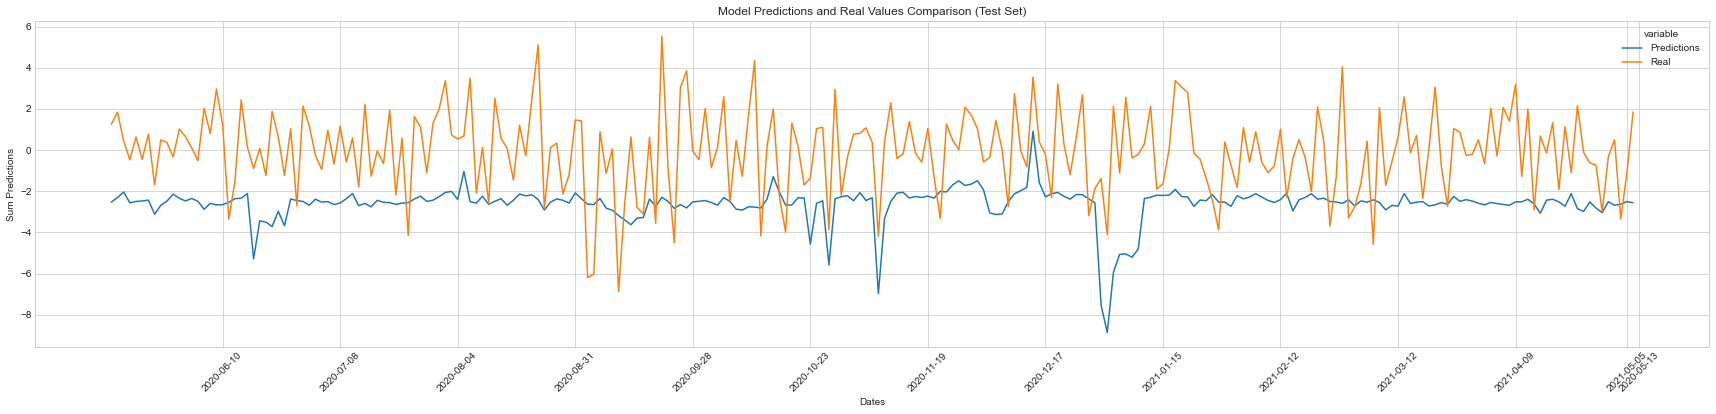

In [15]:
# predsuml = [item for sublist in predsumlist for item in sublist]
realal = [item for sublist in realalist for item in sublist]

diction = {"Predictions": predsumlist, "Real": realal, "Dates": unique}
dfsea = pd.DataFrame(diction) 
dfsea = dfsea.sort_values(by=['Dates'])
plt.style.use('seaborn-whitegrid')

# sortedlist = np.sort(unique)
# sortedlist = sortedlist[0::19]

fig_dims = (30, 6);
fig, ax = plt.subplots(figsize=fig_dims);
sns.lineplot(x='Dates',y='value',hue='variable',ax=ax, data = pd.melt(dfsea,["Dates"]))
ax.set(xlabel='Dates',ylabel='Sum Predictions',title='Model Predictions and Real Values Comparison (Test Set)')
plt.xticks(['2020-05-13','2020-06-10', '2020-07-08', '2020-08-04', '2020-08-31',
 '2020-09-28', '2020-10-23', '2020-11-19', '2020-12-17', '2021-01-15',
 '2021-02-12', '2021-03-12', '2021-04-09','2021-05-05'],rotation=45);

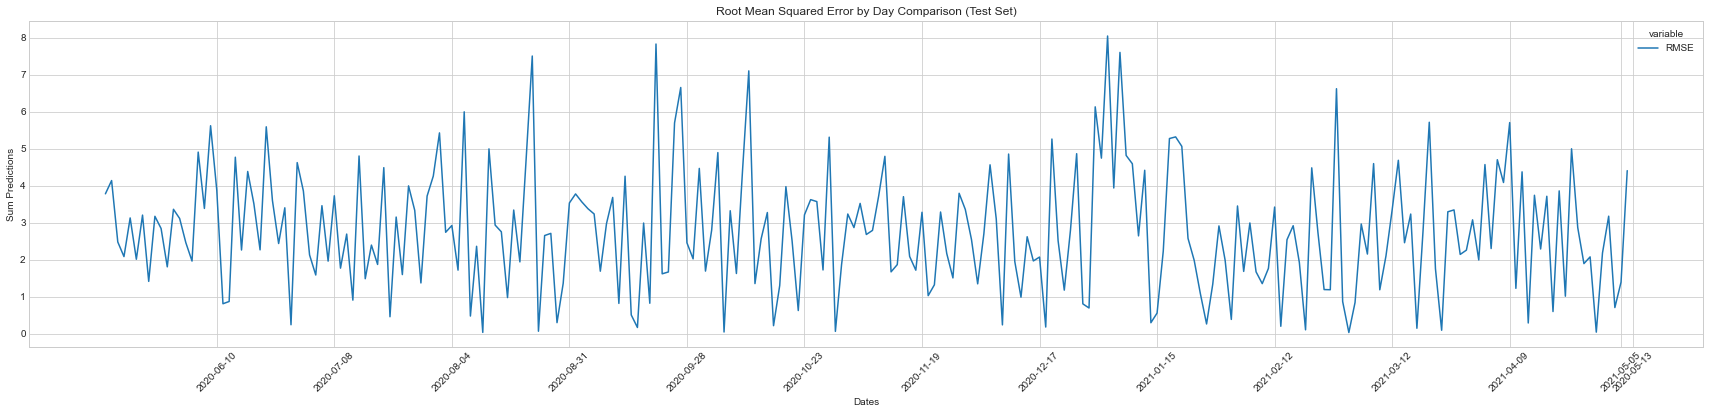

In [16]:
import math
errorlist = []
for x in range(len(predsumlist)):
    error = math.sqrt((predsumlist[x] - realal[x])**2)
    errorlist.append(error)
    
diction = {"RMSE": errorlist, "Dates": unique}
dfsea = pd.DataFrame(diction) 
dfsea = dfsea.sort_values(by=['Dates'])
plt.style.use('seaborn-whitegrid')

# sortedlist = np.sort(unique)
# sortedlist = sortedlist[0::19]
fig_dims = (30, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='Dates',y='value',hue='variable',ax=ax, data = pd.melt(dfsea,["Dates"]))
ax.set(xlabel='Dates',ylabel='Sum Predictions',title='Root Mean Squared Error by Day Comparison (Test Set)')
plt.xticks(['2020-05-13','2020-06-10', '2020-07-08', '2020-08-04', '2020-08-31',
 '2020-09-28', '2020-10-23', '2020-11-19', '2020-12-17', '2021-01-15',
 '2021-02-12', '2021-03-12', '2021-04-09','2021-05-05'],rotation=45);
plt.show()

In [17]:
modelpreds = y_pred_holdout_elastic
y = y_holdout2
z = y_holdout_dates2
unique = z.unique()
profit = 0
bullorbearcount = 0
invested = 0
predsumlist = []
realalist = []
for uni in unique:
    predsum = 0
    reala = 0
    predcount = 0
    for i, (pred, real, date) in enumerate(zip(modelpreds, y, z)):
        if date == uni:
            predsum += pred
            predcount += 1
            reala = real
    predsum = ((predsum/predcount)*14.77377722861989)
#     predsum = (predsum/600)+1
    invested += abs(predsum)
    daychange = predsum * reala
    predsumlist.append(predsum)
    realalist.append(reala)
    profit += daychange
    if predsum > 0 and reala > 0:
        bullorbearcount += 1
    elif predsum < 0 and reala < 0:
        bullorbearcount += 1
print("Profit:", profit)
print("Accuracy:", (bullorbearcount/len(unique)))
print("Sum Invested:", invested)
print("Profitability:", (profit/invested))

Profit: [-11.551313]
Accuracy: 0.5
Sum Invested: 35.55706898517392
Profitability: [-0.32486686]


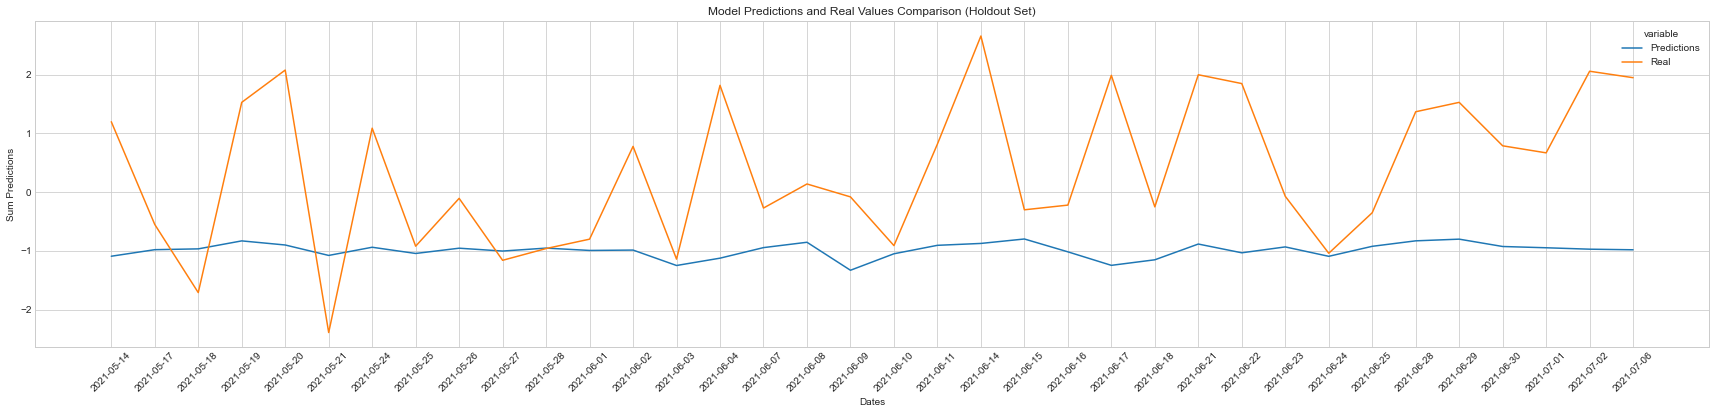

In [18]:
# predsuml = [item for sublist in predsumlist for item in sublist]
realal = [item for sublist in realalist for item in sublist]

diction = {"Predictions": predsumlist, "Real": realal, "Dates": unique}
dfsea = pd.DataFrame(diction) 
dfsea = dfsea.sort_values(by=['Dates'])
plt.style.use('seaborn-whitegrid')

# sortedlist = np.sort(unique)
# sortedlist = sortedlist[0::19]

fig_dims = (30, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='Dates',y='value',hue='variable',ax=ax, data = pd.melt(dfsea,["Dates"]))
ax.set(xlabel='Dates',ylabel='Sum Predictions',title='Model Predictions and Real Values Comparison (Holdout Set)')
plt.xticks(rotation=45)
plt.show()

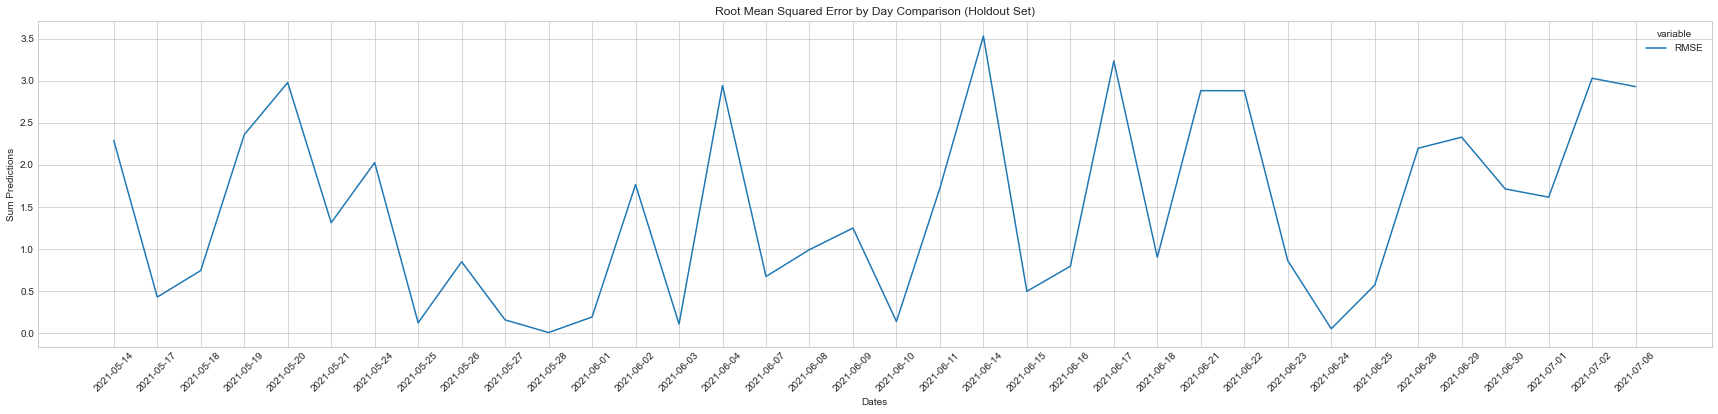

In [19]:
import math
errorlist = []
for x in range(len(predsumlist)):
    error = math.sqrt((predsumlist[x] - realal[x])**2)
    errorlist.append(error)
    
diction = {"RMSE": errorlist, "Dates": unique}
dfsea = pd.DataFrame(diction) 
dfsea = dfsea.sort_values(by=['Dates'])
plt.style.use('seaborn-whitegrid')

# sortedlist = np.sort(unique)
# sortedlist = sortedlist[0::19]

fig_dims = (30, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='Dates',y='value',hue='variable',ax=ax, data = pd.melt(dfsea,["Dates"]))
ax.set(xlabel='Dates',ylabel='Sum Predictions',title='Root Mean Squared Error by Day Comparison (Holdout Set)')
plt.xticks(rotation=45)
plt.show()